In [2]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
data=pd.read_csv(r'C:\Users\user\Desktop\ML\DATA PROJECT\flipkart (1).csv')
data.head()

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [31]:
data.shape

(2304, 4)

In [32]:
data.isnull().sum()

Unnamed: 0      0
Product_name    0
Review          0
Rating          0
dtype: int64

In [33]:
#drop the unnamed column
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [34]:
print(data.describe().T)

         count      mean       std  min  25%  50%  75%  max
Rating  2304.0  4.259549  1.180017  1.0  4.0  5.0  5.0  5.0


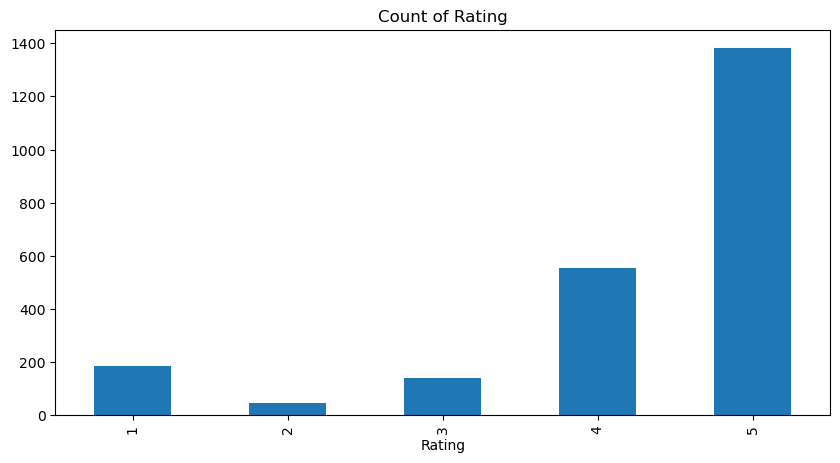

In [35]:
#Figure showing the count of ratings
ax= data['Rating'].value_counts().sort_index().plot(kind='bar',title='Count of Rating',figsize=(10,5))
ax.set_xlabel('Rating')
plt.show()

According to the figure above, more than half of people rated products they bought from Flipkart e-commerce platform with 5 stars.

In [36]:
#Add the positive,negative and neutral columns by calculating the sentiment scores of the reviews.
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data.head()

,Product_name,Review,Rating,Positive,Negative,Neutral
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5,0.314,0.073,0.613
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5,0.744,0.000,0.256
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5,0.119,0.000,0.881
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5,0.568,0.000,0.432
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5,0.467,0.000,0.533


In [39]:
# How most people rated the products in Flipkart
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [38]:
# Total sentiment scores
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  835.669999999999
Negative:  104.91700000000004
Neutral:  1363.413000000003


From the above the positive and neutral sentiment scores are higher than the negative score. This suggest that customers generally have a favorable view of the products or services offered by the Flipkart site.